In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks

In [2]:
Data = pd.read_csv("20231102_AM23NMC00007_CU.csv")

In [3]:
Data['Capacity [As]'] = (Data['Current[A]'][0:-1] * np.diff(Data['Testtime [s]'])).cumsum()
Data['SOC'] = (Data['Capacity [As]']+abs(min(Data['Capacity [As]'])))/max(Data['Capacity [As]']+abs(min(Data['Capacity [As]']))) # Calculate the SOC and add it to the df

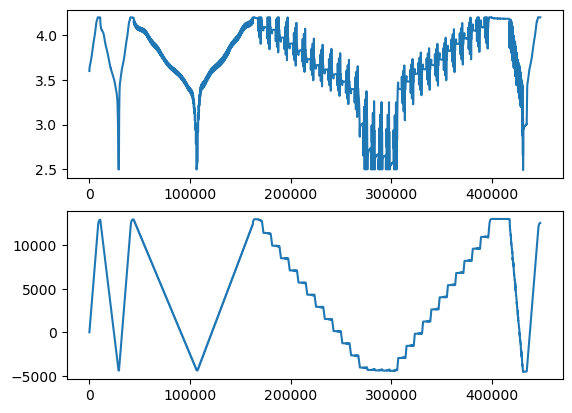

In [5]:
fig, axs = plt.subplots(2,)
axs[0].plot(Data['Testtime [s]'], Data['Voltage[V]'])
axs[1].plot(Data['Testtime [s]'], Data['Capacity [As]'])


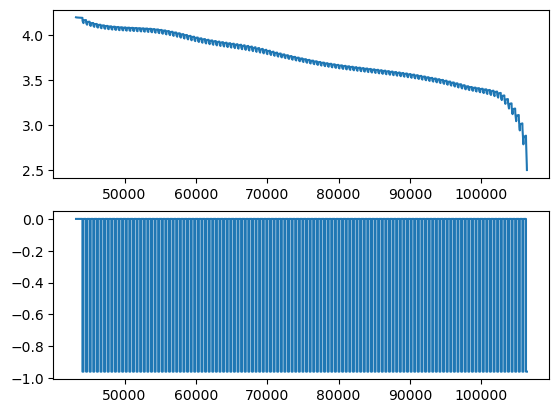

In [8]:
Step_max = 8
Step_min = 6

filter = (Data['StepID']>=Step_min) & (Data['StepID']<=Step_max)
# filter = Data['StepID']==Step
fig, axs = plt.subplots(2,1)
axs[0].plot(Data['Testtime [s]'][filter], Data['Voltage[V]'][filter])
axs[1].plot(Data['Testtime [s]'][filter], Data['Current[A]'][filter])

In [6]:
DischargeStep  = 3

FUDSStep = 49

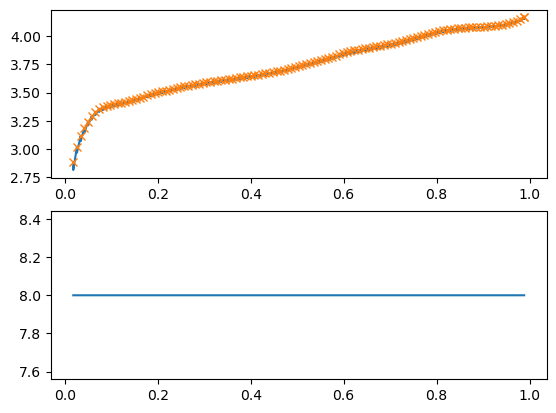

In [42]:
Step = 8
peaks, _ = find_peaks(Data['Voltage[V]'][Data['StepID']==Step].to_numpy(),distance=200) # get peaks from experimental Voltage

x = Data['SOC'][Data['StepID']==Step].to_numpy()[peaks] # filter the point from the SOC Array
# x = np.insert(x,0,0)
# x = np.append(x,1)
y = Data['Voltage[V]'][Data['StepID']==Step].to_numpy()[peaks] # filter the the point from the Volatge Array
# y = np.append(y,0,2.5)
# y = np.insert(y,4.2)
fig, axs = plt.subplots(2,1)
axs[0].plot(Data['SOC'][Data['StepID']==Step], Data['Voltage[V]'][Data['StepID']==Step])
axs[0].plot(x,y,"x")
axs[1].plot(Data['SOC'][Data['StepID']==Step], Data['StepID'][Data['StepID']==Step])

In [43]:
Data['Current[A]']

0          1.4400
1          1.4395
2          1.4396
3          1.4397
4          1.4397
            ...  
1687788    0.0506
1687789    0.0508
1687790    0.0504
1687791    0.0504
1687792    0.0500
Name: Current[A], Length: 1687793, dtype: float64

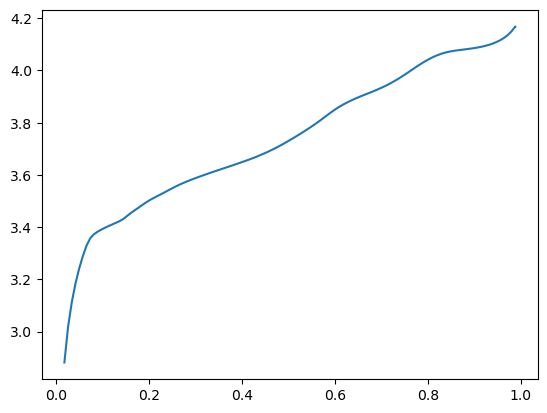

In [45]:
fig, axs = plt.subplots(1,1)
axs.plot(x,y)